In [1]:
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("sent_emails.csv")

In [3]:
df2 = pd.read_csv("responded.csv")

In [4]:
df3 = pd.read_csv("userbase.csv")

In [5]:
df1

,Sent_Date,Customer_ID,SubjectLine_ID
0,2016-01-28,1413,2
1,2016-03-02,83889,2
2,2016-03-09,457832,3
3,2016-01-20,127772,1
4,2016-02-03,192123,3
...,...,...,...
2476349,2016-02-22,460565,3
2476350,2016-02-25,360823,2
2476351,2016-03-02,443177,2
2476352,2016-03-12,179200,3


In [6]:
df2

,Responded_Date,Customer_ID,SubjectLine_ID
0,2016-01-25,217102,3
1,2016-03-26,366875,2
2,2016-03-17,201561,2
3,2016-01-11,395345,3
4,2016-01-11,427539,3
...,...,...,...
378203,2016-01-09,43156,1
378204,2016-03-16,397330,2
378205,2016-02-25,377520,1
378206,2016-02-04,146008,2


In [7]:
df2.sort_values(by='Customer_ID')

,Responded_Date,Customer_ID,SubjectLine_ID
338600,2016-02-28,1,1
365374,2016-01-24,1,2
243228,2016-01-31,3,1
190004,2016-01-26,5,3
322067,2016-01-11,6,3
...,...,...,...
126695,2016-03-07,499997,3
114456,2016-02-15,499997,1
109120,2016-02-29,499998,2
232712,2016-03-25,500000,2


In [8]:
df3

,Customer_ID,Gender,Type,Email_Address,Age,Tenure
0,1,M,C,Mph@msn.com,38,12
1,2,F,B,SophcYN7381qMe8lRqK@aol.com,37,23
2,3,F,C,xE@msn.com,32,15
3,4,M,C,WduR0o0@comcast.net,31,24
4,5,M,C,walHI9cmWJIBKvy0@aol.com,35,13
...,...,...,...,...,...,...
499995,499996,M,B,iMt8ckJsdR@msn.com,25,12
499996,499997,F,C,z58KHLR7VtjRZYZh@gmail.com,30,9
499997,499998,M,B,PGqUn8eT9A4lz7geMZ@comcast.net,30,11
499998,499999,M,C,QkI8AH@hotmail.com,33,11


In [9]:
import pandas as pd

# merge sent_emails and userbase dataframes based on customer_id
merged_df = pd.merge(df1, df3, on='Customer_ID', how='left')

# now merged_df contains all the data from sent_emails and userbase dataframes
# where the customer_id matches
# replace NaN values with a default value
#merged_df = merged_df.fillna(value={'column1': 'default_value1', 'column2': 'default_value2'})

# or remove rows with NaN values
#merged_df = merged_df.dropna()

In [10]:
merged_df['Match'] = 0
for index, row in merged_df.iterrows():
    customer_id = row['Customer_ID']
    subjectline_id = row['SubjectLine_ID']
    match = (df2['Customer_ID'] == customer_id) & (df2['SubjectLine_ID'] == subjectline_id)
    if match.any():
        merged_df.at[index, 'Match'] = 1

In [24]:
import numpy as np

# Create a new column in merged_df to store the result
merged_df['Date_Match'] = 0

# Iterate over the rows of merged_df where Match is 1
for index, row in merged_df[merged_df['Match'] == 1].iterrows():
    customer_id = row['Customer_ID']
    subjectline_id = row['SubjectLine_ID']
    sent_date = row['Sent_Date']
    match_row = df2[(df2['Customer_ID'] == customer_id) & (df2['SubjectLine_ID'] == subjectline_id)]
    responded_date = match_row['Responded_Date'].values[0]
    if pd.to_datetime(sent_date) == pd.to_datetime(responded_date):
        merged_df.at[index, 'Date_Match'] = 1

In [25]:
merged_df

,Sent_Date,Customer_ID,SubjectLine_ID,Gender,Type,Email_Address,Age,Tenure,Match,Date_Match,Responded_Date
0,2016-01-28,1413,2,M,B,Jaj2NuUJneD@gmail.com,44,12,1,0,2016-01-31
1,2016-03-02,83889,2,M,C,Y1Se1qBYrUe@hotmail.com,29,23,0,0,NaN
2,2016-03-09,457832,3,M,C,vAF@gmail.com,26,14,0,0,NaN
3,2016-01-20,127772,1,M,C,QAWqTT@gmail.com,26,15,0,0,NaN
4,2016-02-03,192123,3,M,C,Qtgy0C@msn.com,33,9,1,0,2016-02-04
...,...,...,...,...,...,...,...,...,...,...,...
2632511,2016-02-25,360823,2,M,B,RWZCOsi51@yahoo.com,41,15,1,0,2016-02-26
2632512,2016-02-25,360823,2,M,B,RWZCOsi51@yahoo.com,41,15,1,0,2016-02-21
2632513,2016-03-02,443177,2,F,C,Gie35rV0W@gmail.com,34,24,0,0,NaN
2632514,2016-03-12,179200,3,F,C,9GAWKtezhBeIywHST3@gmail.com,32,17,1,0,2016-02-27


In [286]:
merged_df = df1.merge(df2, on='Customer_ID').merge(df3, on='Customer_ID')

In [287]:
merged_df['one_day_response']= merged_df.apply(lambda row: 1 if row['Sent_Date'] == row['Responded_Date'] else 0, axis=1)

In [26]:
merged_df["Date_Match"].value_counts()

Date_Match
0    2403015
1     229501
Name: count, dtype: int64

In [21]:
df["Match"].value_counts()

Match
0    1636064
1     840290
Name: count, dtype: int64

In [27]:
df = merged_df.drop('Responded_Date', axis=1)

In [29]:
df.to_csv("transformed_data.csv")

In [26]:
# I need a function that will take in a sent_date and received date and return 1 if the email was responded to on the same day, 0 otherwise
def one_day_response(row):
    if row['Sent_Date'] == row['Responded_Date']:
        return 1
    else:
        return 0

In [31]:
df['one_day_response'] = df.apply(one_day_response, axis=1)

In [3]:
from data_pipeline import ETL_Pipeline

In [4]:
etl = ETL_Pipeline()

In [5]:
etl.extract()

In [6]:
etl.data

,Sent_Date,Customer_ID,SubjectLine_ID,Responded_Date,Gender,Type,Email_Address,Age,Tenure
0,2016-01-28,1413,2,2016-01-31,M,B,Jaj2NuUJneD@gmail.com,44,12
1,2016-01-03,1413,2,2016-01-31,M,B,Jaj2NuUJneD@gmail.com,44,12
2,2016-02-03,192123,3,2016-02-04,M,C,Qtgy0C@msn.com,33,9
3,2016-03-22,192123,3,2016-02-04,M,C,Qtgy0C@msn.com,33,9
4,2016-02-07,399506,2,2016-03-24,M,C,JQVjAP2eVCnIz@hotmail.com,26,21
...,...,...,...,...,...,...,...,...,...
996447,2016-02-24,199997,3,2016-02-24,F,C,FTS1fGSti8VbILJQibW@yahoo.com,23,26
996448,2016-02-26,450147,3,2016-02-28,M,B,oO9hwPY@yahoo.com,52,16
996449,2016-03-19,290272,3,2016-03-20,M,C,d@yahoo.com,23,12
996450,2016-02-28,287907,3,2016-03-03,M,C,DY@hotmail.com,20,22


In [7]:
etl.transform()

In [8]:
etl.load()

In [9]:
import pandas as pd

In [30]:

df = pd.read_csv("transformed_data.csv", index_col=0, low_memory=False)

In [31]:
df

,Sent_Date,Customer_ID,SubjectLine_ID,Gender,Type,Email_Address,Age,Tenure,Match,Date_Match
0,2016-01-28,1413,2,M,B,Jaj2NuUJneD@gmail.com,44,12,1,0
1,2016-03-02,83889,2,M,C,Y1Se1qBYrUe@hotmail.com,29,23,0,0
2,2016-03-09,457832,3,M,C,vAF@gmail.com,26,14,0,0
3,2016-01-20,127772,1,M,C,QAWqTT@gmail.com,26,15,0,0
4,2016-02-03,192123,3,M,C,Qtgy0C@msn.com,33,9,1,0
...,...,...,...,...,...,...,...,...,...,...
2632511,2016-02-25,360823,2,M,B,RWZCOsi51@yahoo.com,41,15,1,0
2632512,2016-02-25,360823,2,M,B,RWZCOsi51@yahoo.com,41,15,1,0
2632513,2016-03-02,443177,2,F,C,Gie35rV0W@gmail.com,34,24,0,0
2632514,2016-03-12,179200,3,F,C,9GAWKtezhBeIywHST3@gmail.com,32,17,1,0


Hey Dummy, the environment and state of the action are not matching up, so it always returns maximum negative value. Fix that

To fix the environment we will need to use pandas query and is in to find the information based off of the userbase and email data to apply t he userbase data to the email data, and then to look for data in the response data to see if the email was responded to in the same day or at all.

Change the data to add userbase info to the email data, then add another create column to add if a user responded or nto, then an additional column after that to determine if the response was in the same day or not.

Then we can use the Q learning agent to determine the best action to take based off of the data.

In [13]:
from model import QLearningAgent


In [14]:
from environment import EmailEnvironment

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("test.csv", index_col=0, low_memory=False)

In [11]:
new_df = df.head(1000)

In [12]:
new_df

,Customer_ID,SubjectLine_ID,Gender,Type,Email_Address,Age,Tenure,Match,Date_Match
0,1413,2,M,B,Jaj2NuUJneD@gmail.com,44,12,1,0
1,83889,2,M,C,Y1Se1qBYrUe@hotmail.com,29,23,0,0
2,457832,3,M,C,vAF@gmail.com,26,14,0,0
3,127772,1,M,C,QAWqTT@gmail.com,26,15,0,0
4,192123,3,M,C,Qtgy0C@msn.com,33,9,1,0
...,...,...,...,...,...,...,...,...,...
995,7106,1,M,C,XLukCiMW@msn.com,42,12,0,0
996,313859,1,M,C,2c0SmczmvVPBc@comcast.net,32,11,0,0
997,452486,2,M,C,9F7w@gmail.com,37,15,0,0
998,157685,3,M,C,MLS2qxzH94pJZ@msn.com,20,29,1,1


In [15]:
# Create the environment
data = new_df.values # Load your data here
env = EmailEnvironment(data)

# Create the Q-learning agent
agent = QLearningAgent(env)

# Train the agent
agent.learn(num_episodes=10)

# Play the agent
stats = agent.play()

In [16]:
agent.q_table

{((2, 'M', 'B', 'Jaj2NuUJneD@gmail.com', 44, 12, 1, 0), 2): -9.3125,
 ((2, 'M', 'C', 'Y1Se1qBYrUe@hotmail.com', 29, 23, 0, 0), 2): -9.3125,
 ((3, 'M', 'C', 'vAF@gmail.com', 26, 14, 0, 0), 3): -6.390869140625,
 ((1, 'M', 'C', 'QAWqTT@gmail.com', 26, 15, 0, 0), 1): 7.6796875,
 ((3, 'M', 'C', 'Qtgy0C@msn.com', 33, 9, 1, 0), 2): 5.66015625,
 ((2, 'M', 'C', 'JQVjAP2eVCnIz@hotmail.com', 26, 21, 1, 0), 1): 4.45703125,
 ((2, 'F', 'B', 'CZjbmV6IsyfOb@yahoo.com', 34, 15, 1, 0), 1): -9.3125,
 ((2, 'M', 'C', '5Y6wDLIja7n5FJk5Kn9i@aol.com', 35, 11, 0, 0), 3): -9.3125,
 ((1, 'M', 'B', 'C32@msn.com', 41, 25, 0, 0), 3): -9.3125,
 ((1, 'F', 'C', 'ABCc@aol.com', 27, 8, 0, 0), 1): -5.75,
 ((2, 'M', 'B', 'wQhvalBOeUYGSAPaZ6O@gmail.com', 39, 27, 0, 0),
  1): 11.72149658203125,
 ((2, 'M', 'B', 'u9QH2o@aol.com', 36, 8, 1, 0), 3): 4.25,
 ((3, 'M', 'C', 'xLpxzKkGaHIJUXWeY@hotmail.com', 36, 8, 1, 1), 1): 7.5859375,
 ((2, 'M', 'C', '8EH@gmail.com', 30, 14, 1, 0), 3): 9.41796875,
 ((2, 'M', 'C', 'LENNvtzd1JZ@aol.

In [17]:
agent.learn(num_episodes=100)

In [18]:
len(agent.q_table)

3000

In [19]:
stats

{'total_reward': -44350.0,
 'average_reward': -4435.0,
 'max_reward': -4435.0,
 'min_reward': -4435.0,
 'num_episodes': 10}

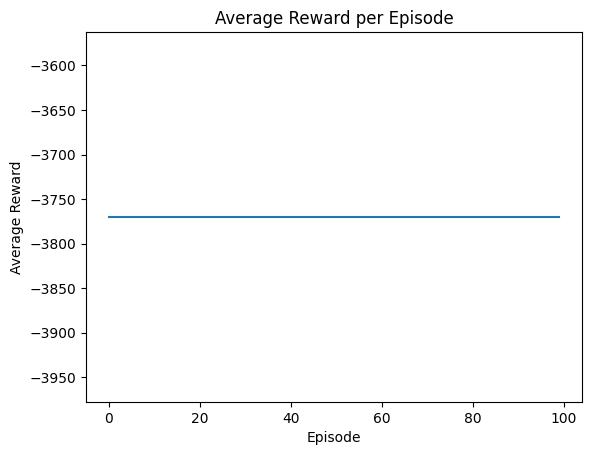

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Train the agent
episode_rewards = []
for episode in range(100):
    episode_reward = 0.0
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        state = next_state
    episode_rewards.append(episode_reward)

# Calculate the average reward per episode
avg_rewards = [np.mean(episode_rewards[0:i]) for i in range(1, len(episode_rewards) + 1)]

# Plot the average reward per episode
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')
plt.show()

In [1]:
from data_pipeline import ETL_Pipeline

In [2]:
etl = ETL_Pipeline()

In [3]:
etl.extract()

In [4]:
etl.transform()

In [5]:
etl.load("test.csv")